## Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Max and Min Filters

(<Axes: title={'center': 'Min Filter'}>,
 Text(0.5, 1.0, 'Min Filter'),
 (-0.5, 463.5, 447.5, -0.5))

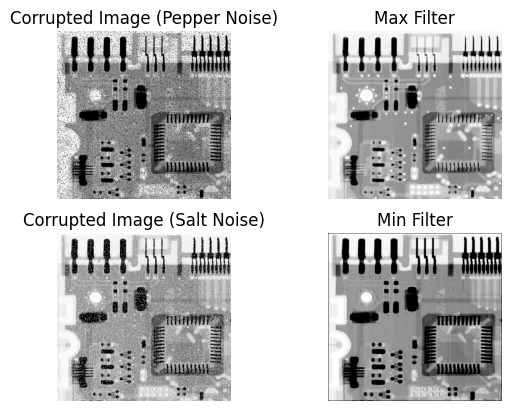

In [8]:
# loading the noisy images
board_pepper = cv2.imread('circuitBoard_pepperNoise.tif')
board_pepper = cv2.cvtColor(board_pepper, cv2.COLOR_BGR2GRAY)

board_salt = cv2.imread('circuitBoard_saltNoise.tif')
board_salt = cv2.cvtColor(board_salt, cv2.COLOR_BGR2GRAY)

def maxFilter(input_image, windowSize = 3):
  # allocating memory for output image
  output = np.zeros((input_image.shape[0], input_image.shape[1]))

  # padding the input image
  input_padded = np.pad(input_image, (1, 1))

  # iterating through the image
  for i in range(input_padded.shape[0] - (windowSize - 1)):
    for j in range(input_padded.shape[1] - (windowSize - 1)):
      output[i, j] = max(input_padded[i: i + windowSize, j: j + windowSize].ravel())

  return output

def minFilter(input_image, windowSize = 3):
  # allocating memory for output image
  output = np.zeros((input_image.shape[0], input_image.shape[1]))

  # padding the input image
  input_padded = np.pad(input_image, (1, 1))

  # iterating through the image
  for i in range(input_padded.shape[0] - (windowSize - 1)):
    for j in range(input_padded.shape[1] - (windowSize - 1)):
      output[i, j] = min(input_padded[i: i + windowSize, j: j + windowSize].ravel())

  return output

# calling the maxFilter and minFilter function
board_maxFilter = maxFilter(board_pepper, 3)
board_minFilter = minFilter(board_salt, 3)

plt.subplot(2, 2, 1), plt.imshow(board_pepper, 'gray'), plt.title('Corrupted Image (Pepper Noise)'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(board_maxFilter, 'gray'), plt.title('Max Filter'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(board_salt, 'gray'), plt.title('Corrupted Image (Salt Noise)'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(board_minFilter, 'gray'), plt.title('Min Filter'), plt.axis('off')

## Median Filter

(<Axes: title={'center': 'Median Filter'}>,
 Text(0.5, 1.0, 'Median Filter'),
 (-0.5, 463.5, 447.5, -0.5))

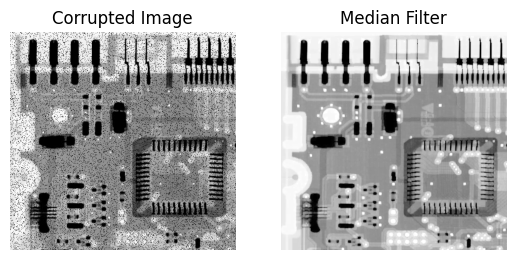

In [10]:
# loading the noisy image
board_saltPepper = cv2.imread('circuitBoard_saltPepperNoise.tif')
board_saltPepper = cv2.cvtColor(board_saltPepper, cv2.COLOR_BGR2GRAY)

def medianFilter(input_image, windowSize = 3):
  # allocating memory for output image
  output = np.zeros((input_image.shape[0], input_image.shape[1]))

  # padding the input image
  input_padded = np.pad(input_image, (1, 1))

  # iterating through the image
  for i in range(input_padded.shape[0] - (windowSize - 1)):
    for j in range(input_padded.shape[1] - (windowSize - 1)):
      output[i, j] = np.median(input_padded[i: i + windowSize, j: j + windowSize].ravel())

  return output

# calling the maxFilter and minFilter function
board_medianFilter = maxFilter(board_pepper, 3)

plt.subplot(1, 2, 1), plt.imshow(board_pepper, 'gray'), plt.title('Corrupted Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(board_medianFilter, 'gray'), plt.title('Median Filter'), plt.axis('off')

## Midpoint Filter

<ipython-input-11-7d52d6c20661>:15: RuntimeWarning: overflow encountered in ubyte_scalars
  output[i, j] = 0.5 * (max(input_padded[i: i + windowSize, j: j + windowSize].ravel()) + min(input_padded[i: i + windowSize, j: j + windowSize].ravel()))


(<Axes: title={'center': 'Midpoint Filter'}>,
 Text(0.5, 1.0, 'Midpoint Filter'),
 (-0.5, 454.5, 439.5, -0.5))

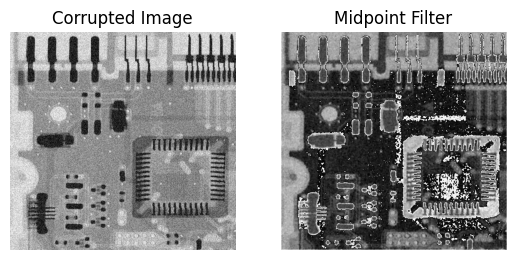

In [11]:
# loading the original image
board_uniform = cv2.imread('circuitBoard_uniformNoise.tif')
board_uniform = cv2.cvtColor(board_uniform, cv2.COLOR_BGR2GRAY)

def midpointFilter(input_image, windowSize = 3):
  # allocating memory for output image
  output = np.zeros((input_image.shape[0], input_image.shape[1]))

  # padding the input image
  input_padded = np.pad(input_image, (1, 1))

  # iterating through the image
  for i in range(input_padded.shape[0] - (windowSize - 1)):
    for j in range(input_padded.shape[1] - (windowSize - 1)):
      output[i, j] = 0.5 * (max(input_padded[i: i + windowSize, j: j + windowSize].ravel()) + min(input_padded[i: i + windowSize, j: j + windowSize].ravel()))

  return output

# calling midpointFilter function
board_midpointFilter = midpointFilter(board_uniform)

plt.subplot(1, 2, 1), plt.imshow(board_uniform, 'gray'), plt.title('Corrupted Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(board_midpointFilter, 'gray'), plt.title('Midpoint Filter'), plt.axis('off')